# Experiments with real data (comparison with baselines)

This notebook reproduces Figure 6 in the paper. It requires output files generated by executing the scripts `scripts/therapy_compute_cf_mdps.sh` (with the `unobserved_reward=normal` option) and `scripts/therapy_evaluation.sh`.

In [1]:
import os
os.chdir("../")

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import json
import copy
import matplotlib.ticker as mtick
from src import utils
from src.utils import get_fig_dim
from IPython.display import clear_output
import matplotlib.pyplot as plt
from src.therapy_mdp import Therapy_MDP
from scipy.stats import entropy

sns.set_theme(context='paper', style='ticks', font_scale=1)

In [3]:
width_pt = 397
palette = sns.color_palette('husl', 7)
type_dict = {
    'id' : int,
    'k' : int,
    'seed' : int,
    'counterfactual outcome' : float
}

In [4]:
files = glob.glob("./outputs/therapy_eval*.json")

dicts = []
for fl_id, fl in enumerate(files):
    clear_output(wait=True)
    print('Reading file ' + str(fl_id+1)+'/'+str(len(files)))
    with open(fl,"r") as f:
        js = json.load(f)
        for seed in js['seeds']:
            # new_js = copy.deepcopy(js)
            new_js = js.copy()
            del new_js['seeds']
            new_js['seed'] = seed
            new_js['counterfactual outcome'] = js['seeds'][seed]
            dicts.append(new_js)

input_df = pd.DataFrame(dicts)

Reading file 5208/5208


In [5]:
data_df = input_df.astype(type_dict) # Fix types
data_df = data_df.replace({'random' : 'Random', 'greedy' : 'Greedy', 'randomized' : 'Noisy greedy', 'optimal' : 'Algorithm 2'})

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


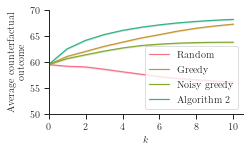

In [6]:
utils.latexify(font_size=10, legend_font_size=10)

fig_height, fig_aspect = get_fig_dim(width_pt, fraction=0.65)
fig, ax = plt.subplots(figsize=(fig_height*fig_aspect,fig_height))

methods = ['Random', 'Greedy', 'Noisy greedy', 'Algorithm 2']
temp_df = data_df[data_df['k']<=10]
sns.lineplot(data=temp_df, x='k', y='counterfactual outcome', hue='policy', hue_order=methods, palette=palette[:4], err_style='band', ax=ax)
sns.despine()

ax.legend(title=None, loc='lower right')
ax.set_ylim([50,70])
ax.set_xlim(left=0)
ax.set_xlabel(r'$k$')
ax.set_ylabel('Average counterfactual\n outcome')

fig.tight_layout()
fig.savefig('figures/therapy_eval_outcome_vs_k.pdf')